In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA SET/UpdatedResumeDataSet.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/DATA SET/UpdatedResumeDataSet.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

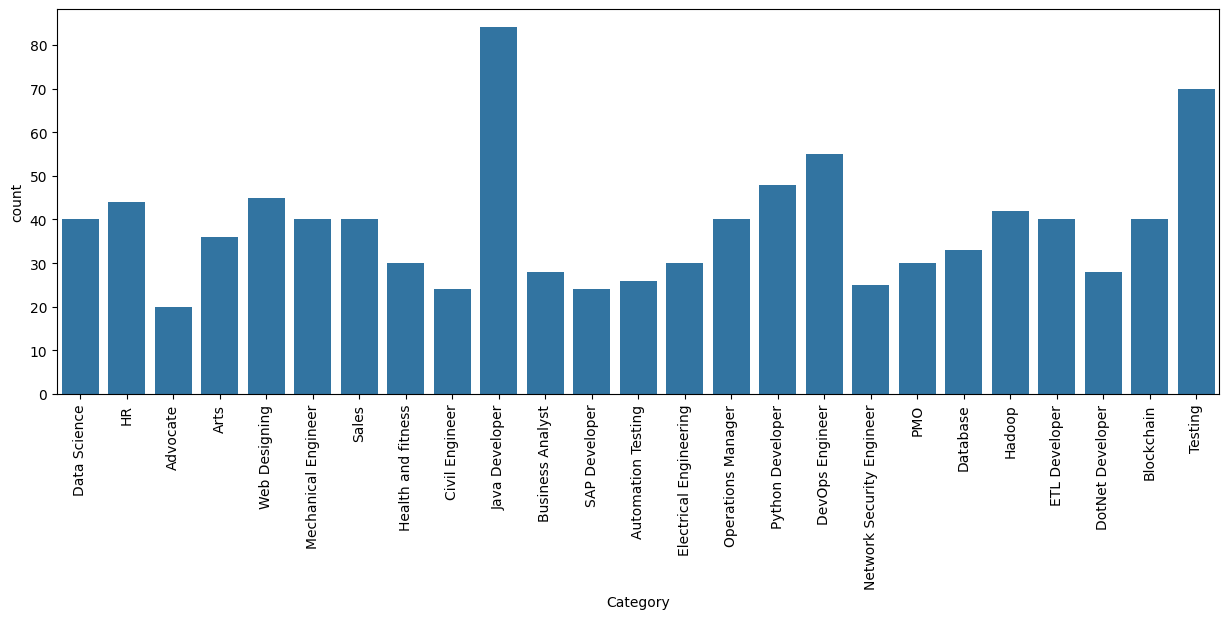

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

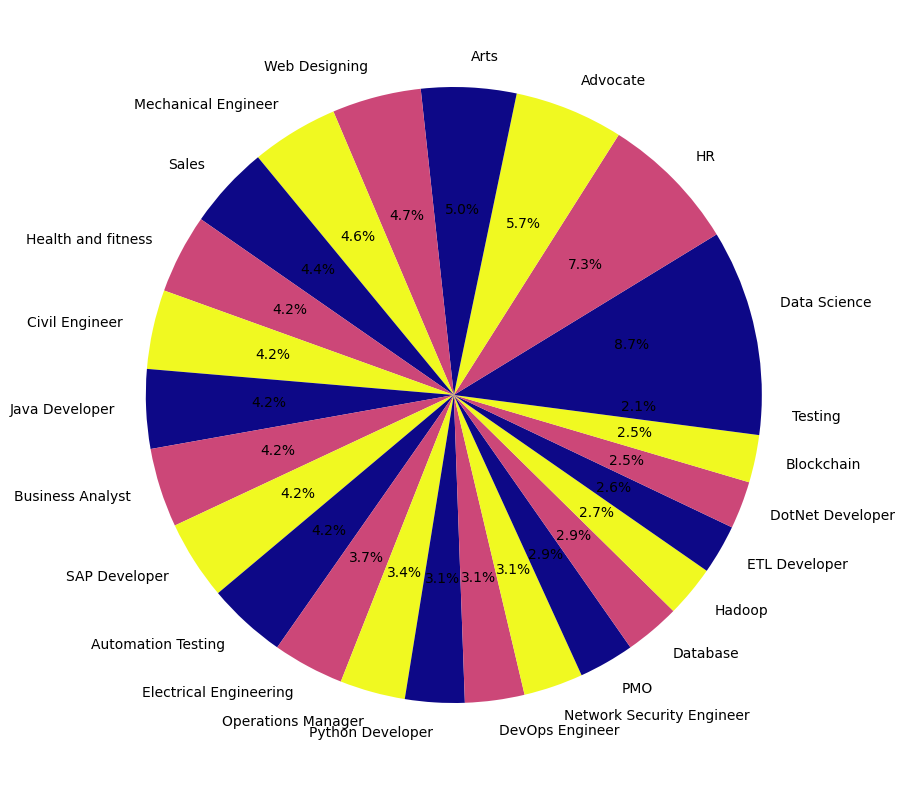

In [ ]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%', colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [ ]:
df['Category'][0]

'Data Science'

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

**Cleaning Data**

In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(769, 7351)

In [ ]:
X_test.shape

(193, 7351)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [ ]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [ ]:
myresume = """GAUTAM DUBEY
 B.Tech. - CSE - Data Science
 Ph: +91-7987544806
 Email: en20cs303023@medicaps.ac.in
 Indore, Madhya Pradesh, India - 453001
 LinkedIn: https://www.linkedin.com/in/gautii296
C++ Python Machine Learning Data Analysis Data Science Data Visualization Data Structures Algorithms
 Problem Solving SQL MySQL
 BRIEF SUMMARY
 I am a final year Computer Science student currently pursuing B-Tech from Medi-Caps University. I am curious programmer and passionate about
 learning new skills related to the latest technology of today's world. I have gained hands-on and practical experience of various kind of technologies
 through my projects and training. My goal is to use my education and skills to contribute in IT sector and and pursue a rewarding career in the same.
 KEY EXPERTISE
 EDUCATION
 2020  -  2024 Medi-Caps University
 B.Tech. - CSE - Data Science | CGPA: 8.86 / 10
 2020 South Valley International School, Indore
 12th | CBSE | Percentage: 78.60 / 100
 2018 South Valley International School, Indore
 10th | CBSE | Percentage: 72.60 / 100
 PROJECTS
 21 Aug, 2023  -  22 Dec, 2023 Sypmto-Scan:-Smart Disease Predictor
 Team Size: 3
 Key Skills: Team Leadership Teamwork Team Management Python Machine Learning
 Led a groundbreaking project titled "Sympto-Scan:- Smart Disease Predictor," aimed at developing a sophisticated AI-driven platform to accurately
 predict diseases based on patient symptoms. The project's primary objective was to enhance the early diagnosis process. The Project achieved an
 accuracy rate of over 90% in disease prediction.
 Stock Price Prediction
 Key Skills: Python Pandas Machine Learning EDA
 Stock Price Prediction is a Machine learning based model in which data set of various company's stock was used for the current price prediction. It
 was developed by using Python and Machine learning concepts.
 ASSESSMENTS / CERTIFICATIONS
 Become a Data Scientist
 Key Skills: Big Data Data Analysis Statistics Data Visualization
 Python for Data Science
 Aggregate: 66 / 100
 Key Skills: Python Machine Learning
 Introduction To CyberSecurity
 Key Skills: Cyber-security
 C/C++ OOPs
 Key Skills: C CPP OOPs
 Google Data Analytics Professional
 Key Skills: Data Collection Data Extraction Data Cleaning Data Processing Data Validation Data Visualization Data Analytics
ACHIEVEMENTS
 Secured 1st position In Footbal Nationals
 Secured 1st position In Debate Competition (Sahodaya)
 SEMINARS / TRAININGS / WORKSHOPS
 CCNAv7 : Introduction To Network Institute Name: Cisco
 Key Skills:
Networking
Computer Networking
CO-CURRICULAR ACTIVITIES
 12 Jun, 2023  -  12 Jul, 2023
 IPv4
IPV6
Subnetting
Network Theory
Ethernet
Switches
Connectivity
 Student Council Head in High School,South Valey International School
 EXTRA CURRICULAR ACTIVITIES
 Winner of Treasunt Hunt(Twice)
 PERSONAL INTERESTS / HOBBIES
 Footbal , Traveling , Listening Music , Watching Shows/Movies
 PERSONAL DETAILS
 Gender: Male
 Marital Status: Single
 Current Address: Indore Road Betma, Indore, Madhya Pradesh, India- 453001
 Emails: en20cs303023@medicaps.ac.in , gautamdubey296@gmail.com
 Date of Birth: 29 Jun, 2002
 Known Languages: Hindi,Englis """

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [ ]:
# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean input resume
cleaned_resume = cleanResume(myresume)

# Transform resume using trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]



In [ ]:
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
